# EDA of Punjab 2022 

* [myneta.info](https://myneta.info/)

## Extracting data

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate", "Party", "Criminal Cases", "Education", "Age", "Constituency",  "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    candidates = 0
    for i in range(1, 150):
        try:
            print("Trying ID", i, end = ' => ')
            url = "https://myneta.info/punjab2022/index.php?action=show_candidates&constituency_id=" + str(i)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            title = soup.title.text
            title = title.split()
            title = title[4:-2]
            title = " ".join(title)
            title = title.title()
            title = title.split(":")
            constituency = "+".join(title)
            title = ",".join(title)
            print("Saving", title, end = ' => ')
            table = soup.find("table", {"id": "table1"})
            rows = table.find_all('tr')
            total_rows = len(rows)
            for i in range(1, total_rows):
                col_data = []
                cols = rows[i].find_all('td')
                total_cols = len(cols)
                for i in range(0, 5):
                    col_data.append(cols[i].text)
                col_data.append(constituency)
                for i in range(5, total_cols):
                    col_data.append(inr_to_int(cols[i].text))                        
                data.append(col_data)
                candidates += 1
        except :
            print('ERROR')
        else:
            constituencies += 1
            print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', candidates, "candidates from", constituencies, "constituencies")
    df.to_csv('punjab.csv', index=False)
    

main()

Trying ID 1 => Saving Gurdaspur , Gurdaspur => SUCCESS
Trying ID 2 => Saving Dina Nagar (Sc) , Gurdaspur => SUCCESS
Trying ID 3 => Saving Qadian , Gurdaspur => SUCCESS
Trying ID 4 => Saving Batala , Gurdaspur => SUCCESS
Trying ID 5 => Saving Sri Hargobindpur (Sc) , Gurdaspur => SUCCESS
Trying ID 6 => Saving Fatehgarh Churian , Gurdaspur => SUCCESS
Trying ID 7 => Saving Dera Baba Nanak , Gurdaspur => SUCCESS
Trying ID 8 => Saving Ajnala , Amritsar => SUCCESS
Trying ID 9 => Saving Raja Sansi , Amritsar => SUCCESS
Trying ID 10 => Saving Majitha , Amritsar => SUCCESS
Trying ID 11 => Saving Jandiala (Sc) , Amritsar => SUCCESS
Trying ID 12 => Saving Amritsar North , Amritsar => SUCCESS
Trying ID 13 => Saving Amritsar West (Sc) , Amritsar => SUCCESS
Trying ID 14 => Saving Amritsar Central , Amritsar => SUCCESS
Trying ID 15 => Saving Amritsar East , Amritsar => SUCCESS
Trying ID 16 => Saving Amritsar South , Amritsar => SUCCESS
Trying ID 17 => Saving Attari (Sc) , Amritsar => SUCCESS
Trying ID

## Visualizing data

In [4]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [5]:
data = pd.read_csv('punjab.csv')
data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Barindermeet Singh Pahra,INC,0,Others,41,Gurdaspur + Gurdaspur,18528272,8545085
1,Deepak Sharma,IND,0,10th Pass,41,Gurdaspur + Gurdaspur,36000,0
2,Gurbachan Singh Babehali,SAD,3,10th Pass,67,Gurdaspur + Gurdaspur,84344610,24700000
3,Gurpreet Singh,IND,0,12th Pass,36,Gurdaspur + Gurdaspur,5200000,1580000
4,Jagdish Masih,IND,0,10th Pass,47,Gurdaspur + Gurdaspur,2500000,0
...,...,...,...,...,...,...,...,...
1271,Rajinder Kaur Rajpura,INC,0,Post Graduate,51,Balluana (Sc) + Fazilka,8902776,650000
1272,Ram Kumar Megh,IND,0,12th Pass,47,Balluana (Sc) + Fazilka,224000,0
1273,Surinder Megh,IND,0,10th Pass,44,Balluana (Sc) + Fazilka,306059,35000
1274,Surinder Singh Khalsa,IND,0,10th Pass,35,Balluana (Sc) + Fazilka,1198500,0


In [6]:
data.describe()

,Criminal Cases,Age,Total Assets,Liabilities
count,1276.000000,1276.000000,1.276000e+03,1.276000e+03
mean,0.449060,48.789969,4.318918e+07,4.889017e+06
std,1.078012,12.279928,1.400253e+08,3.093560e+07
min,0.000000,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,39.000000,8.200000e+05,0.000000e+00
50%,0.000000,48.000000,5.228917e+06,3.000000e+04
75%,0.000000,58.000000,3.089238e+07,1.709700e+06
max,15.000000,94.000000,2.385313e+09,7.175020e+08


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       1276 non-null   object
 1   Party           1276 non-null   object
 2   Criminal Cases  1276 non-null   int64 
 3   Education       1276 non-null   object
 4   Age             1276 non-null   int64 
 5   Constituency    1276 non-null   object
 6   Total Assets    1276 non-null   int64 
 7   Liabilities     1276 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 79.9+ KB


In [8]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

56

In [9]:
candidates = np.size(data["Candidate"])
candidates

1276

In [10]:
candidates - np.size(data["Candidate"].unique())

244

In [11]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

80

In [12]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

5

In [13]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                    Education            
Kulwant Singh                10th Pass                2403078604
Sukhbir Singh Badal          Post Graduate            2026427815
Karan Kaur                   Graduate                 1554162025
Rana Gurjeet Singh           10th Pass                1256436000
Randhir Singh Sivia          10th Pass                1111736762
Surinder Singh               10th Pass                1087449274
Aman Arora                   Graduate                  951292000
Adesh Partap Singh           Post Graduate             831354000
Ranjit Singh Gill            Graduate                  740136238
Sarabjit Singh Makkar        8th Pass                  735562659
Manpreet Singh Badal         Graduate Professional     727006460
Rana Inder Partap Singh      Post Graduate             697552000
Amarinder Singh              12th Pass                 687343757
Vaninder Kaur Loomba         Post Graduate             575197658
Sukhpal Singh Khaira         12th Pass 

In [14]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                     Education            
Rana Gurjeet Singh            10th Pass                717502000
Sukhbir Singh Badal           Post Graduate            669501768
Aman Arora                    Graduate                 228816000
Rohit Vohra                   10th Pass                197825000
Rana Inder Partap Singh       Post Graduate            179703000
Kulwant Singh                 10th Pass                138302082
Arvind Khanna                 Graduate                 121100028
Sunder Sham Arora             10th Pass                111058000
Susheel Kumar Sharma          10th Pass                 99668400
N. K. Sharma                  Graduate                  98955264
Amarinder Singh               12th Pass                 92653369
Sanjiv Khanna                 12th Pass                 84447022
Kuldeep Singh Vaid (Bulara)   Graduate Professional     62563991
Dr. Raj Kumar                 Post Graduate             57666706
Jasdeep Singh                 12th Pas

In [15]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Barindermeet Singh Pahra,INC,0,Others,41,Gurdaspur + Gurdaspur,18528272,8545085
1,Deepak Sharma,IND,0,10th Pass,41,Gurdaspur + Gurdaspur,36000,0
2,Gurbachan Singh Babehali,SAD,3,10th Pass,67,Gurdaspur + Gurdaspur,84344610,24700000
3,Gurpreet Singh,IND,0,12th Pass,36,Gurdaspur + Gurdaspur,5200000,1580000
4,Jagdish Masih,IND,0,10th Pass,47,Gurdaspur + Gurdaspur,2500000,0
...,...,...,...,...,...,...,...,...
1271,Rajinder Kaur Rajpura,INC,0,Post Graduate,51,Balluana (Sc) + Fazilka,8902776,650000
1272,Ram Kumar Megh,IND,0,12th Pass,47,Balluana (Sc) + Fazilka,224000,0
1273,Surinder Megh,IND,0,10th Pass,44,Balluana (Sc) + Fazilka,306059,35000
1274,Surinder Singh Khalsa,IND,0,10th Pass,35,Balluana (Sc) + Fazilka,1198500,0


In [16]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

,Candidate
Party,
IND,377
AAP,116
INC,116
SAD,96
BJP,71
Punjab Lok Congress Party,27
BSP,20
Republican Party of India (A),8


<AxesSubplot:xlabel='Party'>

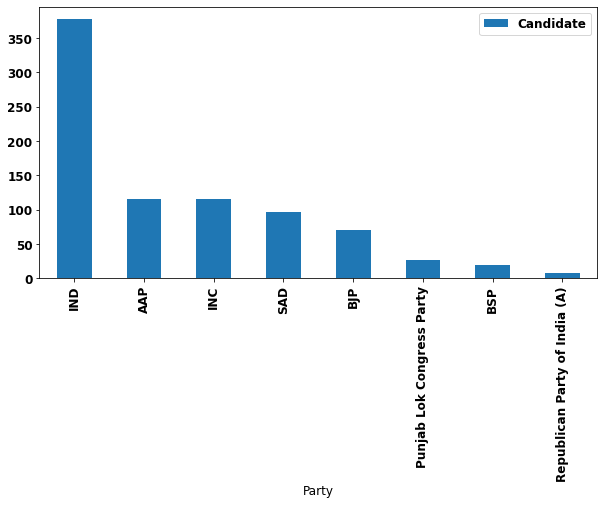

In [17]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

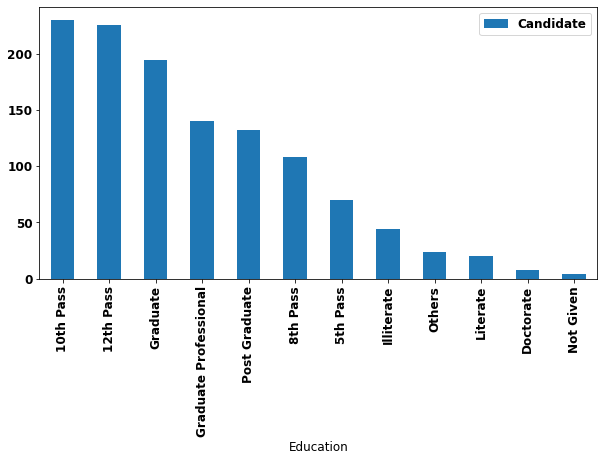

In [18]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [19]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                         \
Party                       AAP   BJP  BSP   INC   IND   
Education                                                
10th Pass                  15.0   6.0  4.0  20.0  93.0   
12th Pass                  22.0  12.0  2.0  16.0  96.0   
5th Pass                    2.0   0.0  0.0   1.0  35.0   
8th Pass                    3.0   7.0  2.0   5.0  43.0   
Doctorate                   3.0   1.0  0.0   1.0   3.0   
Graduate                   20.0  18.0  4.0  32.0  45.0   
Graduate Professional      28.0  12.0  4.0  20.0  27.0   
Illiterate                  0.0   1.0  0.0   0.0  29.0   
Literate                    0.0   0.0  0.0   0.0  11.0   
Not Given                   0.0   0.0  0.0   0.0   2.0   
Others                      4.0   2.0  1.0   4.0   4.0   
Post Graduate              20.0  12.0  3.0  17.0  42.0   

                                                                               \
Party                 Punjab Lok Congress Party Republican Party of India (A)   
Education                                                                       
10th Pass                                   7.0                           4.0   
12th Pass                                   3.0                           3.0   
5th Pass                                    0.0                           0.0   
8th Pass                                    0.0                           1.0   
Doctorate                                   0.0                           0.0   
Graduate                                    7.0                           0.0   
Graduate Professional                       4.0                           0.0   
Illiterate                                  1.0                           0.0   
Literate                                    0.0                           0.0   
Not Given                                   0.0                           0.0   
Others                                      1.0                           0.0   
Post Graduate                               4.0                           0.0   

                             
Party                   SAD  
Education                    
10th Pass              10.0  
12th Pass              16.0  
5th Pass                2.0  
8th Pass                6.0  
Doctorate               0.0  
Graduate               25.0  
Graduate Professional  23.0  
Illiterate              0.0  
Literate                2.0  
Not Given               0.0  
Others                  0.0  
Post Graduate          12.0

In [20]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

,Candidate,Constituency,Party,Education,Criminal Cases
0,Simarjeet Singh,Atam Nagar + Ludhiana,Lok Insaaf Party,Graduate,15
1,Sheetal Angural,Jalandhar West (Sc) + Jalandhar,AAP,10th Pass,9
2,Sukhbir Singh Badal,Jalalabad + Fazilka,SAD,Post Graduate,7
3,Vardev Singh,Guru Har Sahai + Firozpur,SAD,Graduate,7
4,Narinder Kumar,Jalandhar Central + Jalandhar,IND,10th Pass,6
5,Bikram Singh Majithia,Amritsar East + Amritsar,SAD,Graduate,6
6,Hardeep Singh Dimpy Dhillon,Gidderbaha + Sri Muktsar Sahib,SAD,Graduate,6
7,Jasvir Singh,Hoshiarpur + Hoshiarpur,IND,Illiterate,6
8,Virsa Singh Valtoha,Khem Karan + Tarn Taran,SAD,Post Graduate,6
9,Gurmeet Singh Meet Hayer,Barnala + Barnala,AAP,Graduate Professional,5


In [21]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

,Candidate,Constituency,Party,Education,Criminal Cases
0,Barindermeet Singh Pahra,Gurdaspur + Gurdaspur,INC,Others,0
1,Tejinder Singh Deol,Firozpur City + Firozpur,Shiromani Akali Dal (Amritsar)(Simranjit Singh...,Others,0
2,Ashu Banger,Firozpur Rural (Sc) + Firozpur,INC,10th Pass,0
3,Bageecha Singh Dhaliwal,Firozpur Rural (Sc) + Firozpur,Republican Party of India Ektavadi,12th Pass,0
4,Jaswinder Singh,Firozpur Rural (Sc) + Firozpur,Punjab Lok Congress Party,Graduate,0
5,Joginder,Firozpur Rural (Sc) + Firozpur,IND,5th Pass,0
6,Naseeb Kaur,Firozpur Rural (Sc) + Firozpur,Shiromani Akali Dal (Amritsar)(Simranjit Singh...,Illiterate,0
7,Raj Kumar,Firozpur Rural (Sc) + Firozpur,Aas Punjab Party,5th Pass,0
8,Rajneesh Kumar Dahiya,Firozpur Rural (Sc) + Firozpur,AAP,Graduate Professional,0
9,Surjeet Singh,Firozpur Rural (Sc) + Firozpur,Insaniyat Lok Vikas Party,12th Pass,0


<AxesSubplot:xlabel='Party'>

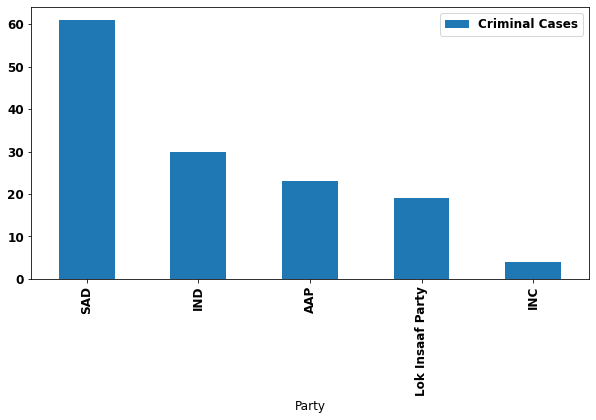

In [22]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [23]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

,Candidate,Constituency,Party,Total Assets
0,Kulwant Singh,S.A.S. Nagar + Sahibzada Ajit Singh Nagar,AAP,2385313439
1,Sukhbir Singh Badal,Jalalabad + Fazilka,SAD,2026427815
2,Karan Kaur,Muktsar + Sri Muktsar Sahib,INC,1554162025
3,Rana Gurjeet Singh,Kapurthala + Kapurthala,INC,1256436000
4,Randhir Singh Sivia,Ludhiana North + Ludhiana,Lok Insaaf Party,1111736762
5,Surinder Singh,Jalalabad + Fazilka,IND,1085985000
6,Aman Arora,Sunam + Sangrur,AAP,951292000
7,Adesh Partap Singh,Patti + Tarn Taran,SAD,831354000
8,Ranjit Singh Gill,Kharar + Sahibzada Ajit Singh Nagar,SAD,740136238
9,Sarabjit Singh Makkar,Jalandhar Cantt + Jalandhar,BJP,735562659


<AxesSubplot:xlabel='Party'>

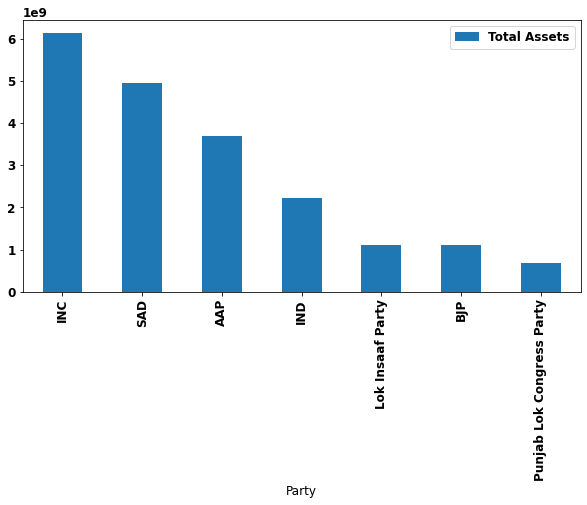

In [24]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 